# Import modules

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the dataset

In [32]:
df = pd.read_csv('bottle.csv',low_memory=False)

In [33]:
df_binary = df[['Salnty', 'T_degC']] # selecting only two attributes from the dataset

In [34]:
df_binary.columns = ['Sal', 'Temp']  # Renaming the attributes

In [35]:
df_binary.head() # head() fetches the first five rows

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


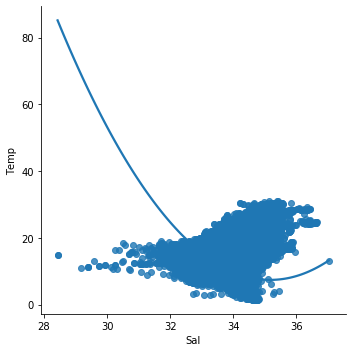

In [36]:
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None) #plotting
plt.savefig("data scatter.jpeg")

# cleaning the data

In [38]:
df_binary.fillna(method ='ffill', inplace = True) # Eliminating NaN using fillna()
df_binary.is_copy = False

In [39]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)  # converting the dataframe into numpy array

In [42]:
df_binary.is_copy = False
df_binary.dropna(inplace = True) # dropping out the NaN values


# Training

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # spliting the data into training 75 % testing 25%

In [44]:
regr = LinearRegression() 

In [45]:
regr.fit(X_train, y_train) # training the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(regr.score(X_test, y_test)) # finding the accuracy

0.20861302859421452


# predicted value for the given value

In [47]:
y_pred = regr.predict(X_test) # predicting the  Temperature value by giving salinity

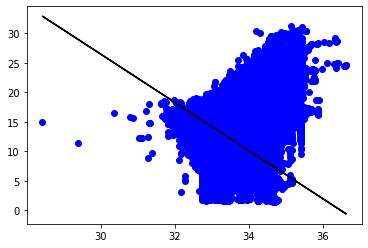

In [48]:
plt.scatter(X_test, y_test, color ='b') # plot for the predicted value
plt.plot(X_test, y_pred, color ='k')
plt.savefig("predict.jpeg")

In [49]:
plt.show()

# working with first 500 rows

In [50]:
# The accuracy for the above trained model is too low so now we start the same process for first 500 rows
df_binary500 = df_binary[:][:500]

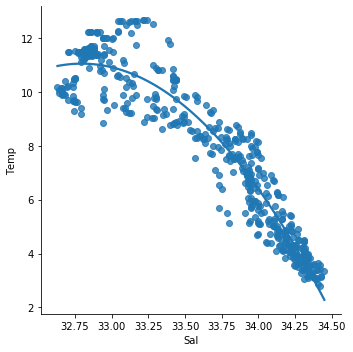

In [51]:
sns.lmplot(x ="Sal", y ="Temp", data = df_binary500,order = 2, ci = None) # plotting the data
plt.savefig("data_reduce.jpeg")

In [52]:
df_binary500.fillna(method ='ffill', inplace = True) # eliminating NaN values

In [53]:
X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1) #converting dataframe to numpy array

In [54]:
df_binary500.dropna(inplace = True) # removing NaN value

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25) # splitting the data for training and testing

In [56]:
regr = LinearRegression()

In [57]:
regr.fit(X_train, y_train) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print(regr.score(X_test, y_test)) # accuracy

0.8568458588982244


In [59]:
y_pred = regr.predict(X_test) # predicting Temperature by giving salinity

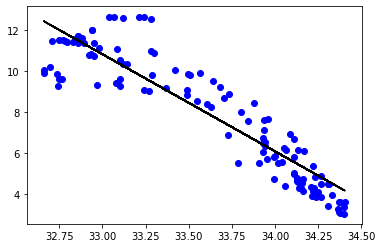

In [60]:
plt.scatter(X_test, y_test, color ='b') # plot for predicted value
plt.plot(X_test, y_pred, color ='k')
plt.savefig("minimum dataset.jpg")
plt.show()